In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Imports**

In [2]:
import pandas as pd
import os
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from collections import Counter 
from sklearn.metrics import classification_report
from sklearn import metrics



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the csv file**

In [3]:
dfmerge = pd.read_csv("/content/gdrive/My Drive/finalmerge.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


**Selecting Feature Columns as X**

In [4]:
X=dfmerge.drop([
               "ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
                  "Unnamed: 0_x",
                  "Unnamed: 0_y",
                  "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",],axis=1)
X


,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
0,1,2016,1,1,741.0,0.0,700,0.0,14747,12478,1600,22,255,113,0.0,10,1015,0,32,26,41,32,74
1,1,2016,1,1,705.0,0.0,700,0.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
2,1,2016,1,1,658.0,0.0,700,3.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
3,1,2016,1,1,723.0,0.0,700,6.0,14747,12478,1500,21,254,113,0.0,10,1016,0,33,24,42,33,74
4,1,2016,1,1,726.0,0.0,700,0.0,14747,12892,1000,10,39,113,0.0,10,1020,9,29,13,53,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,3,2017,9,18,2240.0,0.0,2200,0.0,12478,12892,200,5,220,113,0.0,10,1012,1,70,6,74,74,87
1815401,3,2017,9,21,2358.0,1.0,2200,73.0,12478,12892,200,11,179,143,0.0,10,1010,56,63,12,65,65,91
1815402,3,2017,9,22,2240.0,0.0,2200,0.0,12478,12892,200,10,135,113,0.0,10,1010,3,59,12,67,67,75
1815403,3,2017,9,23,2146.0,0.0,2100,3.0,12478,12892,100,6,202,113,0.0,10,1009,4,61,8,68,68,80


**Selecting Target Variable Y as ArrDel15**

In [5]:
Y=dfmerge["ArrDel15"]
X.shape

(1815405, 23)

In [6]:
import collections
collections.Counter(Y)

Counter({0.0: 1436039, 1.0: 379366})

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30,) 

In [10]:
collections.Counter(Y_train)

Counter({0.0: 1004955, 1.0: 265828})

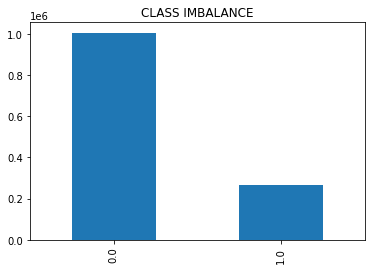

In [11]:
Y_train.value_counts().plot(kind='bar', title='CLASS IMBALANCE');


**OVERSAMPLING USING SMOTE**

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
import collections
collections.Counter(Y_train_res)

Counter({0.0: 1004955, 1.0: 1004955})

**Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)

y_predlog=logreg.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predlog,target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93    431084
     Class 1       0.74      0.78      0.76    113538

    accuracy                           0.90    544622
   macro avg       0.84      0.85      0.85    544622
weighted avg       0.90      0.90      0.90    544622



**EXTRA TREES**




In [0]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_jobs=-1,random_state = 42)
etc.fit(X_train_res,Y_train_res)

Y_predetc=etc.predict(X_test)



In [24]:
target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_predetc,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94    431084
     Class 1       0.77      0.76      0.76    113538

    accuracy                           0.90    544622
   macro avg       0.85      0.85      0.85    544622
weighted avg       0.90      0.90      0.90    544622



In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predetc)

0.9028390333111773

**DECISION TREE**

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train_res, Y_train_res)

Y_preddec=clf.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_preddec,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92    431084
     Class 1       0.68      0.70      0.69    113538

    accuracy                           0.87    544622
   macro avg       0.80      0.81      0.80    544622
weighted avg       0.87      0.87      0.87    544622



**Gaussian Naive Bayes**

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res,Y_train_res)

Y_predgau=gnb.predict(X_test)

print(classification_report(Y_test, Y_predgau))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    431084
         1.0       0.74      0.76      0.75    113538

    accuracy                           0.90    544622
   macro avg       0.84      0.85      0.84    544622
weighted avg       0.90      0.90      0.90    544622



**XGBOOST**

In [28]:
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_res, Y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
X_test_np = X_test.values

In [0]:
Y_predxgb=model.predict(X_test_np)

In [31]:
target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_predxgb,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.95      0.94    431084
     Class 1       0.79      0.75      0.77    113538

    accuracy                           0.91    544622
   macro avg       0.86      0.85      0.85    544622
weighted avg       0.90      0.91      0.90    544622

